### Milestone report- Coursera Data Science Specialization Capstone Project

This milestone report summarizes my initial efforts in building a Swiftkey like prediction application. The main focus of this report is to load the data, and do some basic exploratory data analysis. In the coming weeks, when building the real application, I would like to put more effort in cleaning and preprocessing the data.

The main hurdle in this project comes from the data itself, it is uncleaned text. Natural language processing in R is unintutive, I switched to Python for this project. Python has state of the art NLP tools, and it's very easy to use. In the future, I would like do the preprocessing in Python and use R to build the actual application using Shiny utilizing the best of the both worlds!

Let's load some libraries.

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

Populating the interactive namespace from numpy and matplotlib


### Reading the files

We have three files named blogs, news and tweets. 

Let's see how many lines we have here in each file.

In [2]:
num_lines = sum(1 for line in open('en_US/en_US.blogs.txt'))
print num_lines

899288


In [3]:
num_lines = sum(1 for line in open('en_US/en_US.news.txt'))
print num_lines

77259


In [4]:
num_lines = sum(1 for line in open('en_US/en_US.twitter.txt'))
print num_lines

2360148


We will be generating n-grams for building our application, but generating n-grams for all the data is memory exhaustive, so we will confine our analysis to first 10% of the lines in each case.

In [5]:
with open('en_US/en_US.blogs.txt') as myfile:
    blogs = [next(myfile) for x in xrange(899288//10)]

Let us take a peek at what we have in here. I can see three problems with the text we have here already.

1. Strange 'ascii' codes like \xe2 would make the n-gram generation tough
2. Punctuation
3. Numbers are not necessary for our application

In [6]:
blogs[0:5]

['In the years thereafter, most of the Oil fields and platforms were named after pagan \xe2\x80\x9cgods\xe2\x80\x9d.\n',
 'We love you Mr. Brown.\n',
 'Chad has been awesome with the kids and holding down the fort while I work later than usual! The kids have been busy together playing Skylander on the XBox together, after Kyan cashed in his $$$ from his piggy bank. He wanted that game so bad and used his gift card from his birthday he has been saving and the money to get it (he never taps into that thing either, that is how we know he wanted it so bad). We made him count all of his money to make sure that he had enough! It was very cute to watch his reaction when he realized he did! He also does a very good job of letting Lola feel like she is playing too, by letting her switch out the characters! She loves it almost as much as him.\n',
 'so anyways, i am going to share some home decor inspiration that i have been storing in my folder on the puter. i have all these amazing images store

In [7]:
with open('en_US/en_US.news.txt') as myfile:
    news = [next(myfile) for x in xrange(77259//10)]

In [8]:
news[0:5]

["He wasn't home alone, apparently.\n",
 'The St. Louis plant had to close. It would die of old age. Workers had been making cars there since the onset of mass automotive production in the 1920s.\n',
 "WSU's plans quickly became a hot topic on local online sites. Though most people applauded plans for the new biomedical center, many deplored the potential loss of the building.\n",
 'The Alaimo Group of Mount Holly was up for a contract last fall to evaluate and suggest improvements to Trenton Water Works. But campaign finance records released this week show the two employees donated a total of $4,500 to the political action committee (PAC) Partners for Progress in early June. Partners for Progress reported it gave more than $10,000 in both direct and in-kind contributions to Mayor Tony Mack in the two weeks leading up to his victory in the mayoral runoff election June 15.\n',
 "And when it's often difficult to predict a law's impact, legislators should think twice before carrying any b

In [9]:
with open('en_US/en_US.twitter.txt') as myfile:
    tweets = [next(myfile) for x in xrange(2360148//10)]

In [10]:
tweets[0:5]

['How are you? Btw thanks for the RT. You gonna be in DC anytime soon? Love to see you. Been way, way too long.\n',
 "When you meet someone special... you'll know. Your heart will beat more rapidly and you'll smile for no reason.\n",
 "they've decided its more fun if I don't.\n",
 'So Tired D; Played Lazer Tag & Ran A LOT D; Ughh Going To Sleep Like In 5 Minutes ;)\n',
 'Words from a complete stranger! Made my birthday even better :)\n']

In [11]:
w = blogs + news + tweets

### Cleaning the text

I would like to clean the data before we do any further analysis. We will use NLTK and Textblob to perform some natural language processing tasks. Fortunately, CountVectorizer method in sklearn comes with some nice preprocessing.

Let's join all the three lists to a string.

In [12]:
string = ' '.join(w)

In [13]:
string[500:1500]

"we know he wanted it so bad). We made him count all of his money to make sure that he had enough! It was very cute to watch his reaction when he realized he did! He also does a very good job of letting Lola feel like she is playing too, by letting her switch out the characters! She loves it almost as much as him.\n so anyways, i am going to share some home decor inspiration that i have been storing in my folder on the puter. i have all these amazing images stored away ready to come to life when we get our home.\n With graduation season right around the corner, Nancy has whipped up a fun set to help you out with not only your graduation cards and gifts, but any occasion that brings on a change in one's life. I stamped the images in Memento Tuxedo Black and cut them out with circle Nestabilities. I embossed the kraft and red cardstock with TE's new Stars Impressions Plate, which is double sided and gives you 2 fantastic patterns. You can see how to use the Impressions Plates in this tut

#### Removing ascii codes

In [14]:
string = unicode(string, 'ascii', 'ignore')

In [15]:
string[500:1500]

u"w he wanted it so bad). We made him count all of his money to make sure that he had enough! It was very cute to watch his reaction when he realized he did! He also does a very good job of letting Lola feel like she is playing too, by letting her switch out the characters! She loves it almost as much as him.\n so anyways, i am going to share some home decor inspiration that i have been storing in my folder on the puter. i have all these amazing images stored away ready to come to life when we get our home.\n With graduation season right around the corner, Nancy has whipped up a fun set to help you out with not only your graduation cards and gifts, but any occasion that brings on a change in one's life. I stamped the images in Memento Tuxedo Black and cut them out with circle Nestabilities. I embossed the kraft and red cardstock with TE's new Stars Impressions Plate, which is double sided and gives you 2 fantastic patterns. You can see how to use the Impressions Plates in this tutorial

#### Removing numbers

In [16]:
import re
string = re.sub(r'\d+', '', string)

In [17]:
string[500:1500]

u"w he wanted it so bad). We made him count all of his money to make sure that he had enough! It was very cute to watch his reaction when he realized he did! He also does a very good job of letting Lola feel like she is playing too, by letting her switch out the characters! She loves it almost as much as him.\n so anyways, i am going to share some home decor inspiration that i have been storing in my folder on the puter. i have all these amazing images stored away ready to come to life when we get our home.\n With graduation season right around the corner, Nancy has whipped up a fun set to help you out with not only your graduation cards and gifts, but any occasion that brings on a change in one's life. I stamped the images in Memento Tuxedo Black and cut them out with circle Nestabilities. I embossed the kraft and red cardstock with TE's new Stars Impressions Plate, which is double sided and gives you  fantastic patterns. You can see how to use the Impressions Plates in this tutorial 

#### Removing offensive words

TO DO

Offensive word list source : http://stackoverflow.com/a/17706025

In [23]:
# splitting them back
string = string.split('\n')

In [24]:
string[0:4]

[u'In the years thereafter, most of the Oil fields and platforms were named after pagan gods.',
 u' We love you Mr. Brown.',
 u' Chad has been awesome with the kids and holding down the fort while I work later than usual! The kids have been busy together playing Skylander on the XBox together, after Kyan cashed in his $$$ from his piggy bank. He wanted that game so bad and used his gift card from his birthday he has been saving and the money to get it (he never taps into that thing either, that is how we know he wanted it so bad). We made him count all of his money to make sure that he had enough! It was very cute to watch his reaction when he realized he did! He also does a very good job of letting Lola feel like she is playing too, by letting her switch out the characters! She loves it almost as much as him.',
 u' so anyways, i am going to share some home decor inspiration that i have been storing in my folder on the puter. i have all these amazing images stored away ready to come to

We will CountVectorizer() for getting the n-grams and we will select first 1000 features.

In [25]:
cv = CountVectorizer(ngram_range=(2,2),max_features=1000,stop_words='english')

CountVectorizer() is aggressive, it removed all the punctuation. But, I would like to keep it. We can use NLTK to pass a seperate tokenizer. For some reason, I couldn't get it to work properly.

In [ ]:
#from nltk.tokenize import TreebankWordTokenizer

In [ ]:
# We will get only the top 1000 features.
#cv = CountVectorizer(ngram_range=(2,2),max_features=1000,stop_words='english',
                    # tokenizer=TreebankWordTokenizer().tokenize)

In [26]:
s = cv.fit_transform(string)

In [27]:
X= s.todense()

In [28]:
X.shape

(333668L, 1000L)

In [29]:
features = cv.get_feature_names()

In [30]:
# we'll get the frequencies of each word
counts = np.asarray(X.sum(axis=0)).ravel().tolist()

In [31]:
bigrams = pd.DataFrame({'term': features, 'occurrences': np.asarray(counts)})

In [32]:
bigrams.head()

,occurrences,term
0,68,able make
1,66,absolutely love
2,150,act like
3,72,american idol
4,75,answer question


In [34]:
bigrams = bigrams.sort_values('occurrences',ascending=False).head(n=10)

We will define a function that will automagically do everything for us. This is why I started liking Python in general, fast prototyping.

In [35]:
def ngram_freq_generator(string,n,features_no):
    cv = CountVectorizer(ngram_range=(n,n),max_features=features_no,stop_words='english')
    s = cv.fit_transform(string)
    X = s.todense()
    features = cv.get_feature_names()
    counts = np.asarray(X.sum(axis=0)).ravel().tolist()
    grams_df = pd.DataFrame({'term': features, 'occurrences': np.asarray(counts)})
    grams_df = grams_df.sort_values('occurrences',ascending=False)
    return grams_df

In [36]:
trigrams = ngram_freq_generator(string,3,2000)

In [37]:
trigrams.head()

,occurrences,term
710,207,happy new year
709,174,happy mothers day
708,168,happy mother day
1350,119,new york city
1142,93,looking forward seeing


In [38]:
trigrams.tail()

,occurrences,term
251,5,dick clark died
1837,5,tonight don know
406,5,dont want work
1100,5,lol good morning
1614,5,shoutout new followers


In [39]:
bigrams = ngram_freq_generator(string,2,2000)

In [40]:
bigrams.head()

,occurrences,term
291,1227,don know
383,1160,feel like
907,1138,let know
1040,1073,looking forward
608,880,happy birthday


In [41]:
bigrams.tail()

,occurrences,term
148,37,coming end
1939,37,work better
1937,37,word god
1357,37,pretty amazing
1371,37,quote day


In [43]:
onegrams = ngram_freq_generator(string,1,2000)

In [44]:
onegrams.head()

,occurrences,term
925,25383,just
999,22746,like
1787,17486,time
1038,15449,love
727,15237,good


In [45]:
onegrams.tail()

,occurrences,term
95,286,attitude
815,285,hip
1158,285,musical
1852,285,universe
868,285,inch


In [46]:
fourgrams = ngram_freq_generator(string,4,2000)

In [47]:
fourgrams.head()

,occurrences,term
48,48,amazon services llc amazon
1566,48,services llc amazon eu
72,33,ass ass ass ass
905,28,just finished mi run
1130,27,martin luther king jr


In [48]:
fourgrams.tail()

,occurrences,term
279,2,come ability triumph begins
1341,2,pepper cook covered minutes
1342,2,pepper cover skillet cook
1347,2,persons day really care
1298,2,optimistic moby dick row


In [49]:
fivegrams = ngram_freq_generator(string,5,2000)

In [50]:
fivegrams.head()

,occurrences,term
51,48,amazon services llc amazon eu
74,31,ass ass ass ass ass
316,24,content appears website comes amazon
1802,24,uk amazon amazon fr amazon
530,24,fees advertising linking amazon com


In [51]:
fivegrams.tail()

,occurrences,term
1119,2,mp cost attacks enemies damage
1118,2,moving files devl production requires
1117,2,moving does make progress alfred
1116,2,moving away work life balance
1000,2,love trip favorite restaurant week


In [52]:
sixgrams = ngram_freq_generator(string,6,2000)

In [53]:
sixgrams.head()

,occurrences,term
77,29,ass ass ass ass ass ass
305,24,com participant amazon services llc amazon
1951,24,wordpress com participant amazon services llc
333,24,content provided subject change removal time
59,24,appears website comes amazon services llc


In [54]:
sixgrams.tail()

,occurrences,term
780,2,hope ll enjoy project way let
779,2,hope know growing emocional leave loveu
778,2,hooker gal cathyllogan amazon kindle whores
777,2,honest promise brand deepest way ensure
1999,2,yu love yur fans support yu


We considered only 10% of the text in each file for exploratory data analysis and it looks promising. The two-grams and three-grams generated using this model are great features to include in our text next word prediction. We will have to clean the corpus for offensive words, and we have to include more data to generate the features.

### Visualization

(0, 26000)

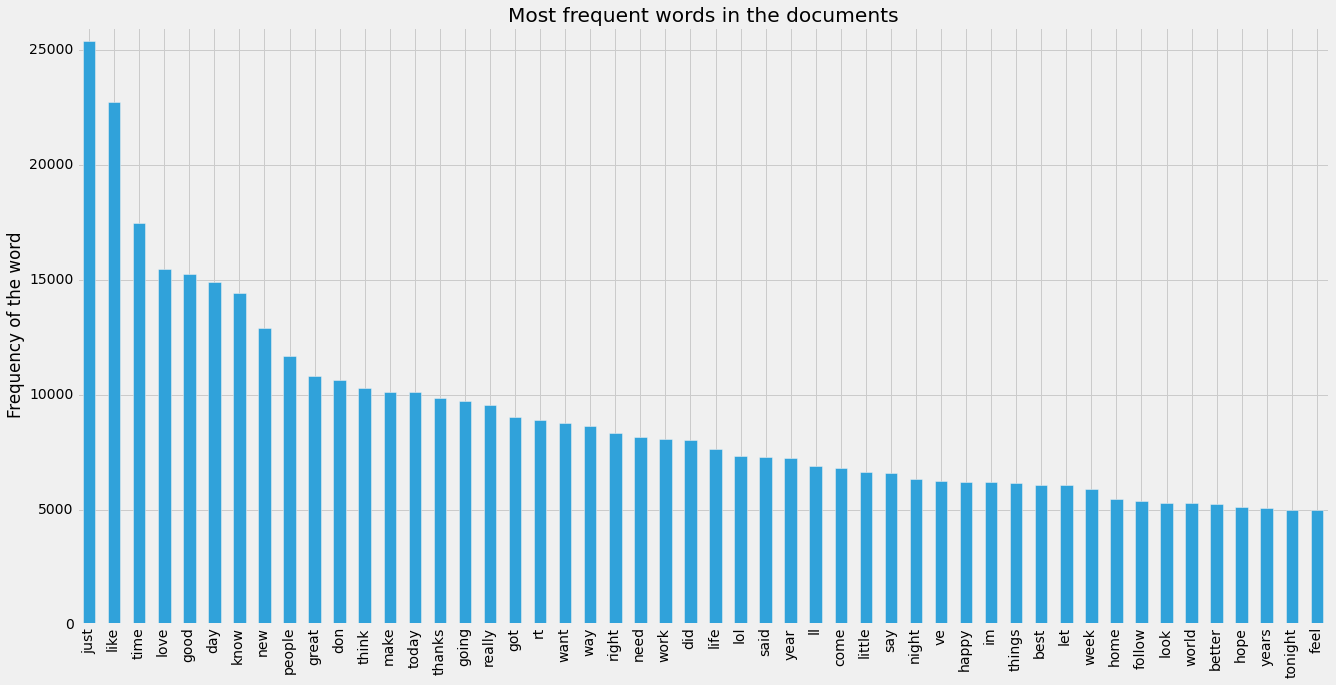

In [55]:
# one-gram
ax = onegrams.occurrences.head(50).plot(kind='bar')
ax.set_ylabel('Frequency of the word')
ax.set_xticklabels(onegrams.term.head(50).ravel(),rotation=90)
ax.set_title('Most frequent words in the documents')
ax.set_ylim((0,26000))

In [56]:
def plot_first_50_grams(df,num,angle):
    ax = df.occurrences.head(num).plot(kind='bar')
    ax.set_ylabel('Frequency of the word')
    ax.set_xticklabels(df.term.head(num).ravel(),rotation=angle)
    ax.set_title('Most frequent words in the documents')    

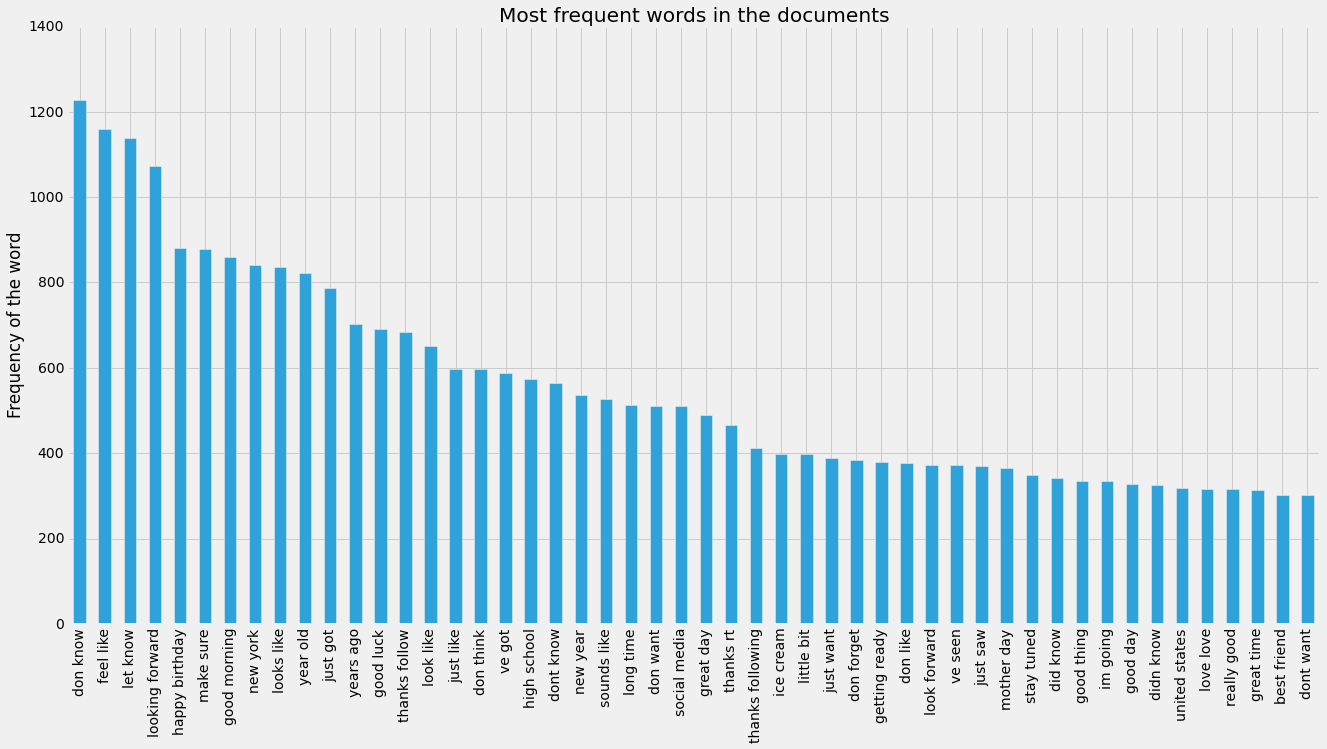

In [57]:
# bigrams
plot_first_50_grams(bigrams,50,90)

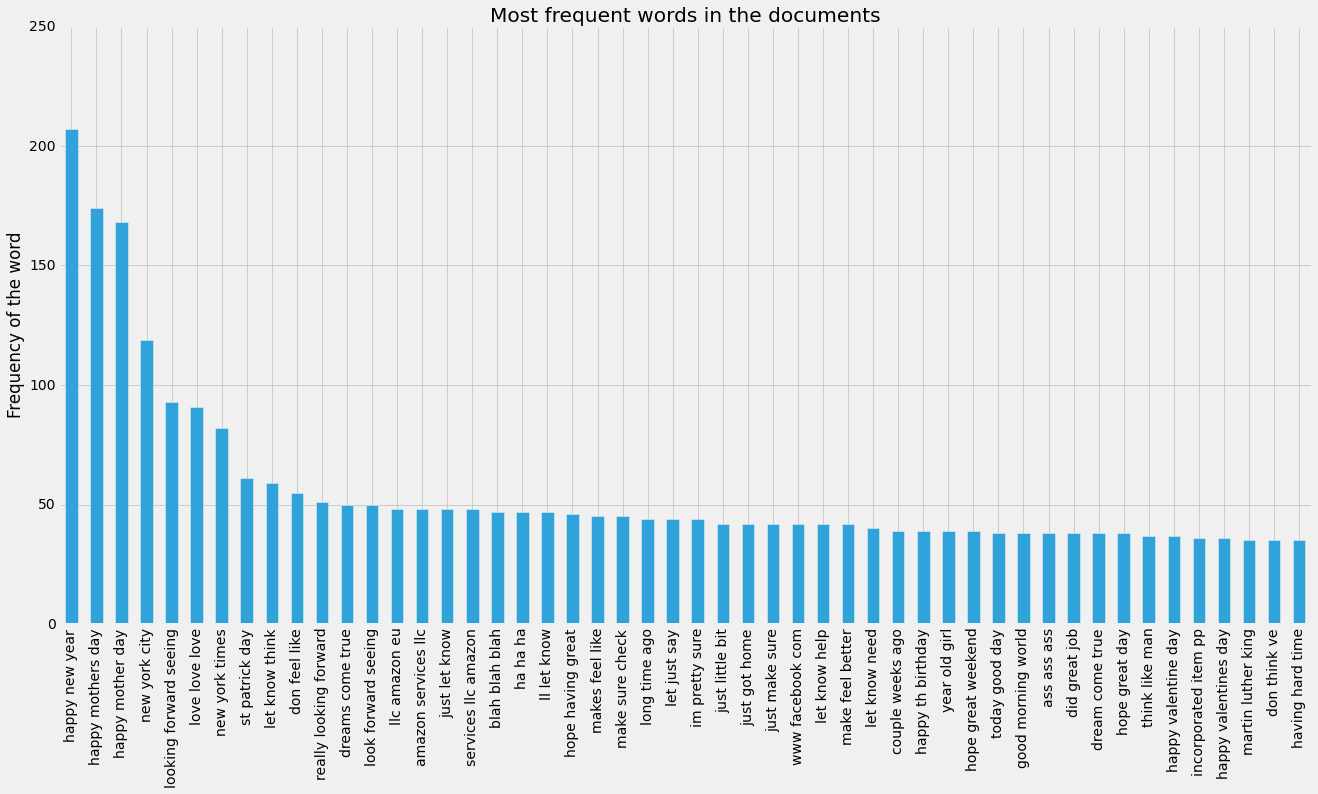

In [58]:
# trigrams
plot_first_50_grams(trigrams,50,90)